In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

In [2]:
data=pd.read_csv('./Stress-Lysis.csv')
data.head()  # displays the first five rows of the dataframe

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [3]:
data.shape

(2001, 4)

In [8]:
data.describe()

,Humidity,Temperature,Step_count,Stress_Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout

import os

class StopTrainingOnHighAccuracy(Callback):
    def __init__(self, monitor='val_accuracy', target=1.0, save_path="final_model.h5"):
        super().__init__()
        self.monitor = monitor
        self.target = target
        self.save_path = save_path

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        current = logs.get(self.monitor)
        
        if current is not None and current >= self.target:
            print(f"\nEpoch {epoch + 1}: {self.monitor} reached {self.target}. Stopping training.")
            # Save the model
            self.model.save(self.save_path)
            self.model.stop_training = True
# Separate features and target
X = data.drop(columns=['Stress_Level']).values  # Features
y = data['Stress_Level'].values  # Target
y = to_categorical(y, num_classes=3)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()

# Input layer (Conv1D)
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Convolutional layer 1
model.add(Conv1D(128, kernel_size=3, activation='relu'))

# Max pooling layer 1
model.add(MaxPooling1D(pool_size=2))

# Convolutional layer 2
model.add(Conv1D(256, kernel_size=3, activation='relu'))

# Max pooling layer 2
model.add(MaxPooling1D(pool_size=2))

# Flatten the output of the convolutions
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_save_path = "final_model.h5"
stop_training_callback = StopTrainingOnHighAccuracy(
    monitor='val_accuracy', 
    target=1.0, 
    save_path=model_save_path
)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[stop_training_callback])


# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

c:\Users\Sanju\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Input 0 of layer "conv1d_4" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (None, 3)

In [5]:
def celsius_to_fahrenheit(celsius):
    fahrenheit = (celsius * 9/5) + 32
    return fahrenheit

new_data = np.array([[21.33, celsius_to_fahrenheit(32.4), 123]])  # Ganti dengan nilai fitur yang diinginkan

# Pastikan jumlah fitur sesuai dengan yang digunakan saat training
# Preprocessing sama seperti saat training
# new_data_scaled = scaler.transform(new_data)  # Scaling menggunakan scaler yang sama
# new_data_reshaped = new_data_scaled.reshape((new_data_scaled.shape[0], new_data_scaled.shape[1], 1))

# Melakukan prediksi
prediction = model.predict(new_data)
predicted_class = np.argmax(prediction, axis=1)  # Mendapatkan kelas prediksi

# Convert predicted class back to original label
# predicted_label = label_encoder.inverse_transform(predicted_class)

print("Predicted Stress Level:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step
Predicted Stress Level: [1]


In [6]:
from tensorflow.keras.models import load_model
best_model = load_model(model_save_path)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


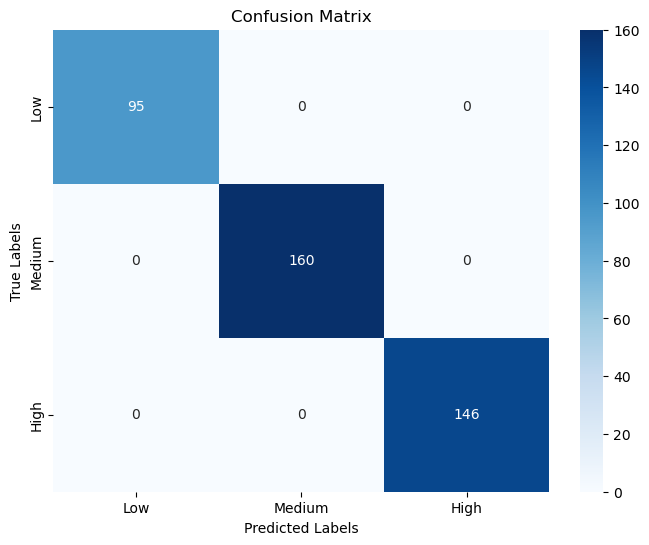

In [10]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
labels = ['Low', 'Medium', 'High']  # Adjust these labels as necessary

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

class_report = classification_report(y_true, y_pred_classes, target_names=labels)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00        95
      Medium       1.00      1.00      1.00       160
        High       1.00      1.00      1.00       146

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401

